# Probability maps of deformation

This notebook aims at creating illustrative maps of probability. Having ensemble simulations enables us to communicate on uncertainties in the result. The probability maps are a way to communicate about these uncertainties. 

We interest ourselves here in the probability that a high hourly deformation happens at least once in a day or in the probability that a high hourly deformation never happens over a given day. The sum of these two probabilities equals one. The same probabilities but over a given period are also computed.

Some functions used here come from the homemade Python package: libiceedge.py. So, make sure to install Python_library library and that Python is able to locate it: put **export PYTHONPATH=<path_to_Python_library\>:${PYTHONPATH}** in your .bashrc, .profile or equivalent.

In [1]:
#Libraries needed

##Loading

import xarray as xr
import numpy as np

##Computing

import libiceedge

##Graphical display

import matplotlib.pyplot as plt

Name: libiceedge
Package: 
This is a collection of functions to look at the sea ice edge.
Name: libdiv
Package: 
This is a collection of diverse functions.


### Loading the data

In [2]:
#Information about the data to load
directory="/lustre/fsstor/projects/rech/cli/commun/NANUK4/" #where the data are
exp_interest="EBLKBBM050" #name of the experiment of interest
period_interest="19970327_19970405" #name of the period of interest
nb_member=20 #number of members
print(period_interest,exp_interest,nb_member)

19970327_19970405 EBLKBBM050 20


In [3]:
#Loading the data of the experiment and period of interest

fq_outputs="1h" #hourly outputs

dat_sea_ice=[] #list that will contain the members of the experiment of interest
for imb in range(1,nb_member+1): #iteration over the members
    path=directory+"*"+exp_interest+"-S/*/"+str(imb).zfill(3)+"*"+exp_interest+"_"+fq_outputs+"_"+period_interest+"_icemod.nc4"
    print(path)
    dat_sea_ice.append(xr.open_mfdataset(path,decode_times=True))
print(len(dat_sea_ice))

/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/001*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/002*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/003*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/004*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/005*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/006*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/007*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/008*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/009*EBLKBBM050_1h_19970327_19970405_icemod.nc4
/lustre/fs

In [4]:
#Saving the time size
size_t=dat_sea_ice[0].sizes["time_counter"]
print(size_t)

240


In [5]:
#Saving the size of the spatial dimensions
size_y=dat_sea_ice[0].sizes["y"]
size_x=dat_sea_ice[0].sizes["x"]
print(size_y,size_x)

566 492


In [6]:
#Loading the daily data of the experiment and period of interest

fq_outputs="1d" #daily outputs

dat_sea_ice_daily=[] #list that will contain the members of the experiment of interest (daily outputs)
for imb in range(1,nb_member+1):
    path=directory+"*"+exp_interest+"-S/*/"+str(imb).zfill(3)+"*"+exp_interest+"_"+fq_outputs+"_"+period_interest+"_icemod.nc4"
    print(path)
    dat_sea_ice_daily.append(xr.open_mfdataset(path,decode_times=True))
print(len(dat_sea_ice_daily))

/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/001*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/002*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/003*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/004*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/005*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/006*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/007*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/008*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fsstor/projects/rech/cli/commun/NANUK4/*EBLKBBM050-S/*/009*EBLKBBM050_1d_19970327_19970405_icemod.nc4
/lustre/fs

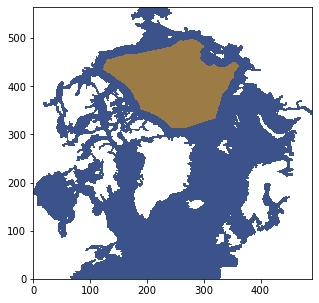

In [7]:
#Loading some masks

dat_masks=xr.open_dataset(directory+"NANUK4.L31-I/mesh_mask_NANUK4_L31_4.2_1stLev.nc",decode_times=True) #configuration masks
dat_masks_domain=xr.open_dataset("/lustre/fswork/projects/rech/cli/udf71br/Laurines_work_Datlas/Masks/masks_domain_threshold_0.5.nc",decode_times=True) #domain masks

##Visualisation of the configuration and domain tmasks

fig=plt.figure(figsize=(5,5))
plt.contourf(dat_masks.tmask[0,0,:,:].where(dat_masks.tmask[0,0,:,:]>0))
plt.contourf(dat_masks_domain.tmask.where(dat_masks_domain.tmask>0),colors="orange",alpha=0.5)
plt.show()

### Computing the probabilities

We compute the probability of having at least once over the day the occurrence of the event defo>threshold_high_defo (proba_at_least_once_day). We also compute the same probability but over the period (proba_at_least_once_period). To compute these probabilities, we use the function "fproba_occurence_ce" of the Python library libiceedge.py.

We are also interested in the probability of not even once over the day/period having the occurrence of the event defo>threshold_high_defo. These probabilities are computed as 1-proba_at_least_once_day and 1-proba_at_least_once_period.

In [8]:
#Some useful variables
coef_defo=24.*3600.
##the threshold corresponds to the 95% quantile
if "BBM" in exp_interest:#BBM threshold
    ce_defo=0.06/coef_defo
elif "EVP" in exp_interest:#EVP threshold
    ce_defo=0.05/coef_defo
else:
    print("problem")
print(exp_interest,ce_defo*coef_defo)

EBLKBBM050 0.05999999999999999


In [9]:
#Probability maps of having at least once data>ce_defo on a given day
list_days=list(set([t//24+1 for t in range(size_t)])) #list of the days
print(list_days,len(list_days))

proba_defo_occur_day=xr.DataArray(data=np.zeros((len(list_days),size_y,size_x)),dims=["day","y","x"])#initialisation
for it in range(len(list_days)):#iteration over time
    t0=it*24 ; tend=(it+1)*24-1 #first and last instants of the day
    proba_defo_occur_day[it,:,:]=libiceedge.fproba_occurence_ce(dat_sea_ice,"sidefo-t",ce_defo,t0,tend)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10] 10


In [10]:
#Probability maps of having at least once data>ce_defo on the period
proba_defo_occur_period=libiceedge.fproba_occurence_ce(dat_sea_ice,"sidefo-t",ce_defo,0,size_t-1)

### Preparation of the concentration fields for the visualisation of the ice edge

In [11]:
#Preparation of the concentration fields for the visualisation of the ice edge

dat_concentration_daily=[] #list that will contain the daily concentration fields of each member
dat_concentration_mean_period=[] #list that will contain the mean concentration field of each member, mean over the period

for imb in range(nb_member): #iteration over the members
    ##store the daily concentration fields
    dat_concentration_daily.append(dat_sea_ice_daily[imb]["siconc"])

    ##compute the mean field over the period
    dat_concentration_mean_period.append(dat_concentration_daily[imb].sum("time_counter")/len(dat_concentration_daily[imb].time_counter))

print(np.shape(dat_concentration_daily),np.shape(dat_concentration_mean_period))

(20, 10, 566, 492) (20, 566, 492)


### Illustrative figures

#### defo > ce_defo at least once a day

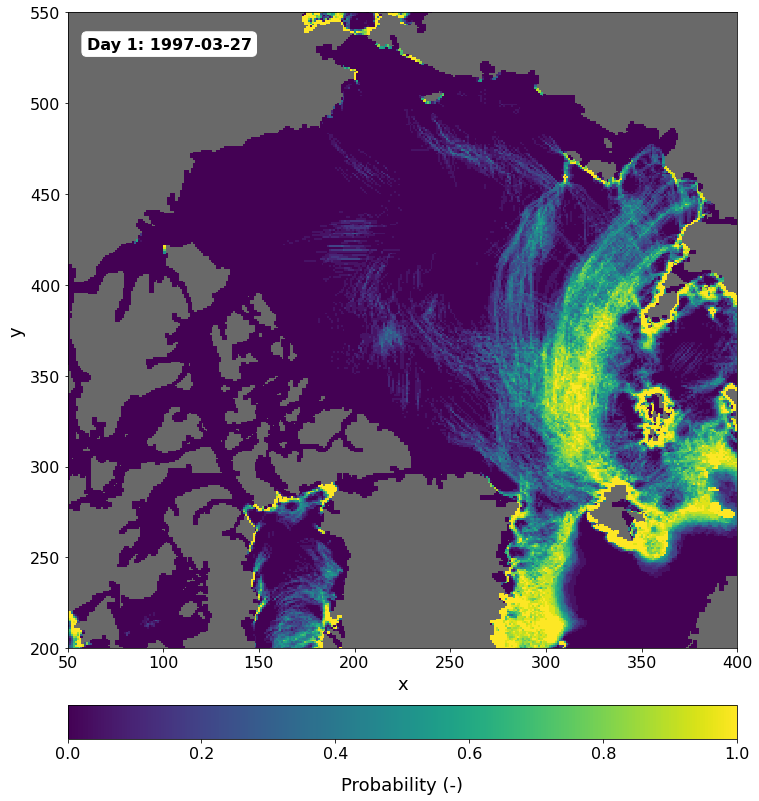

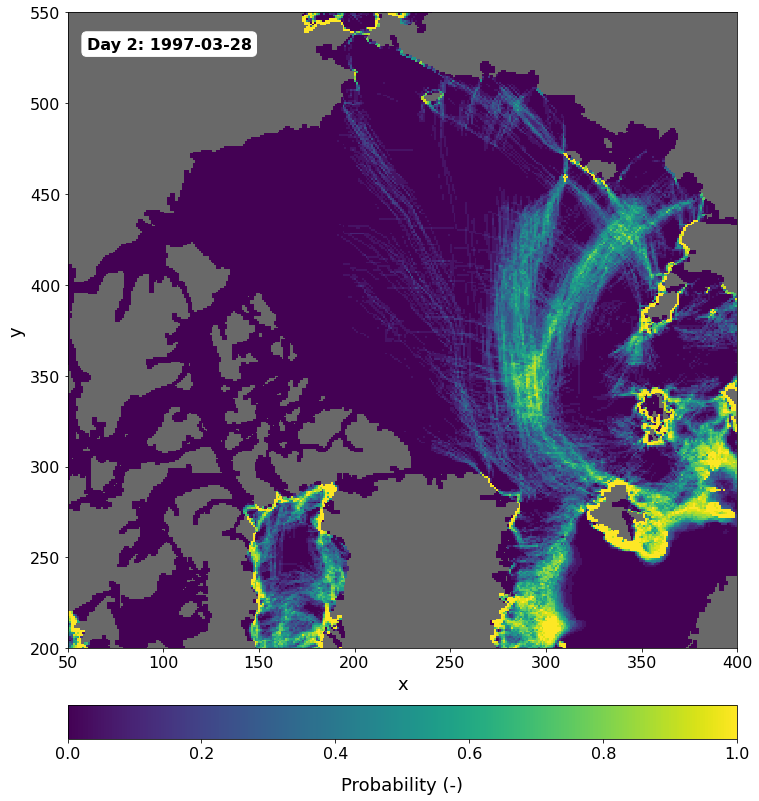

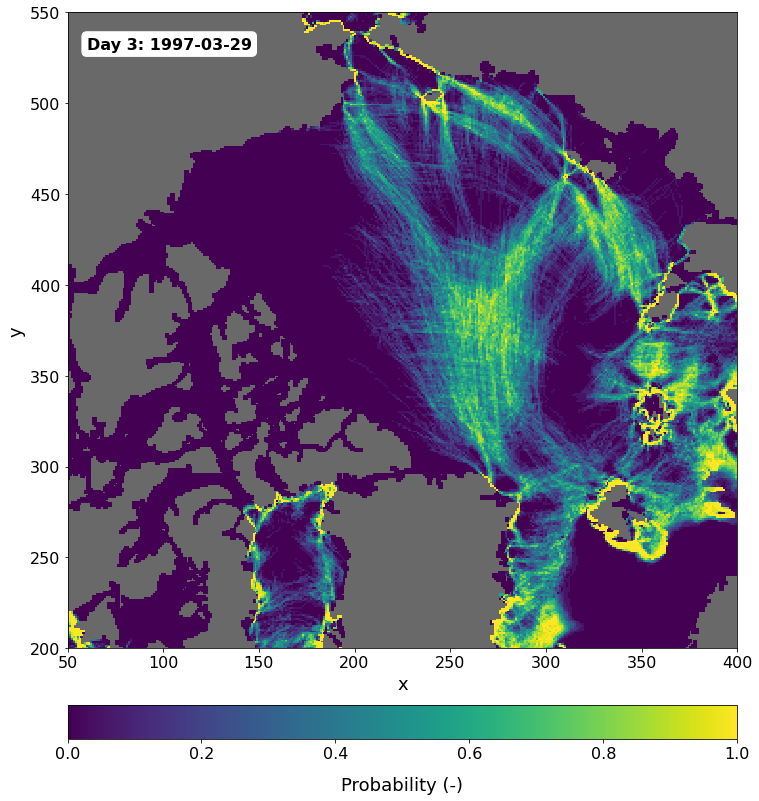

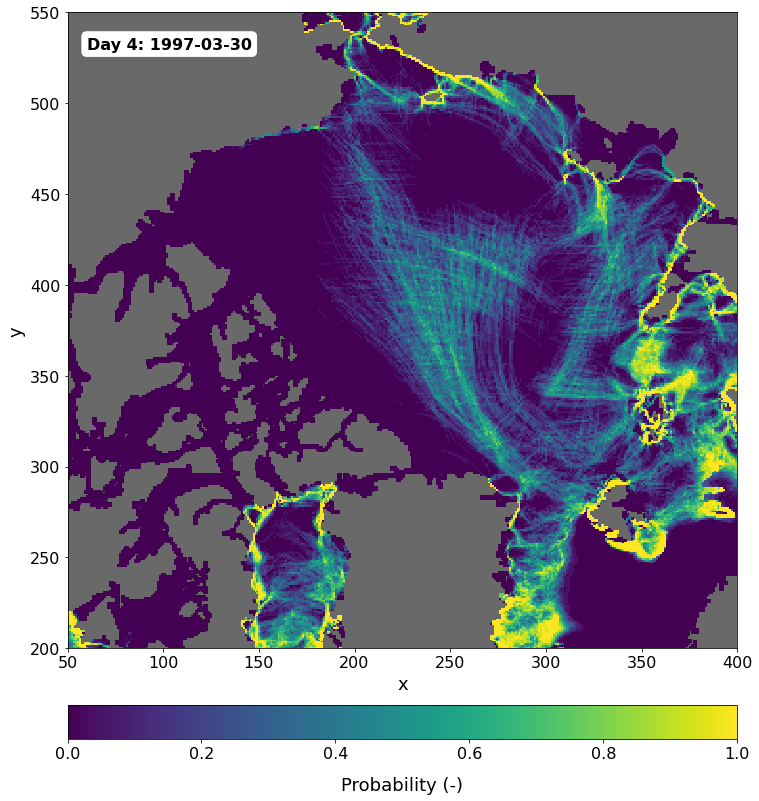

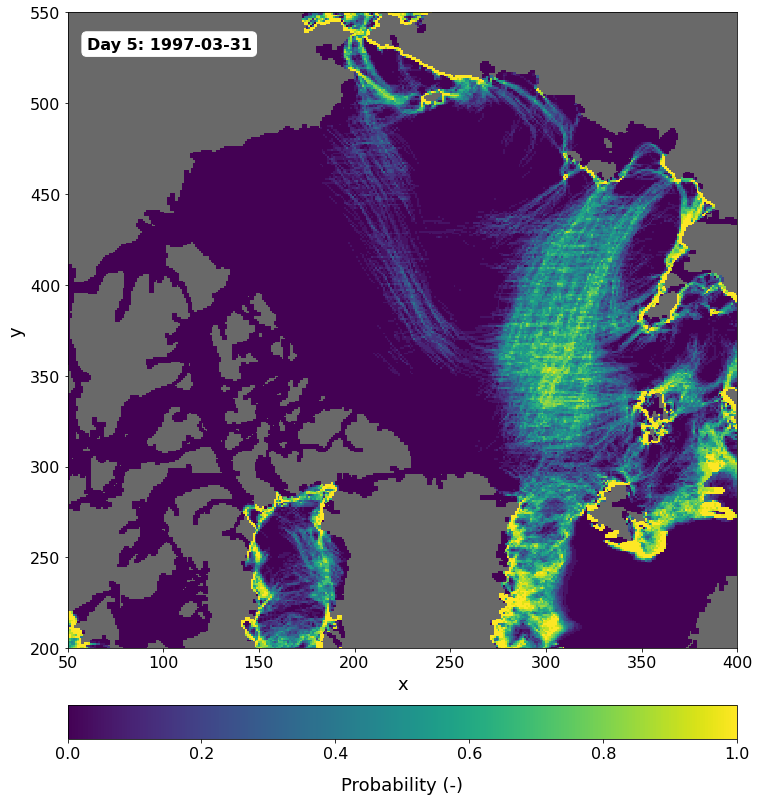

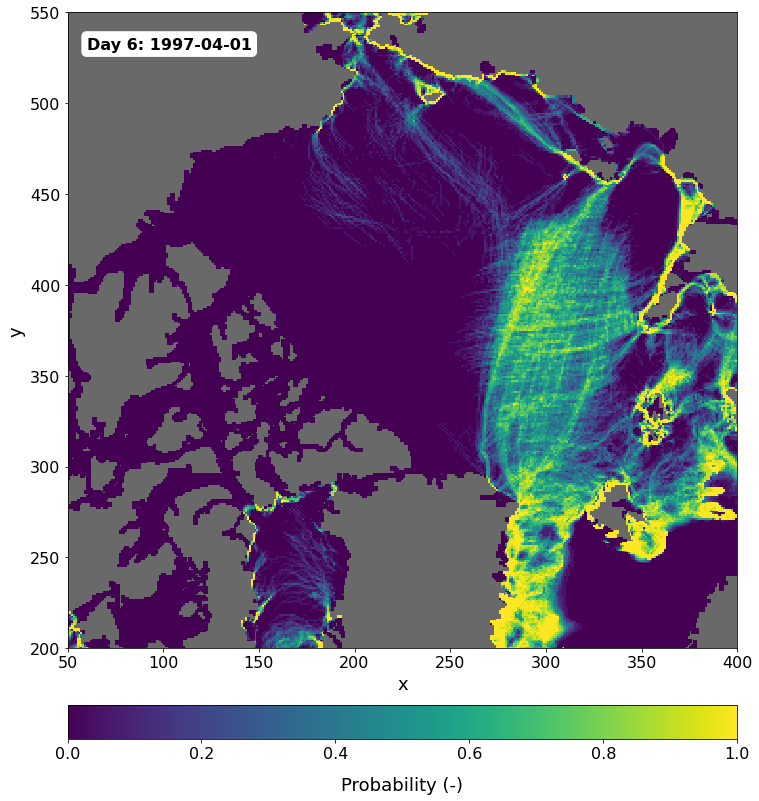

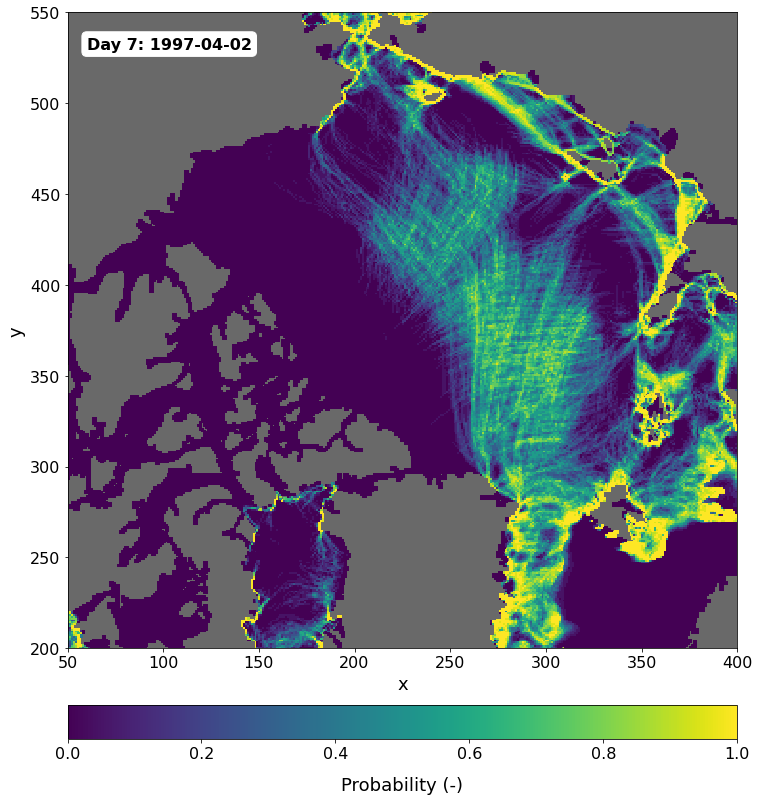

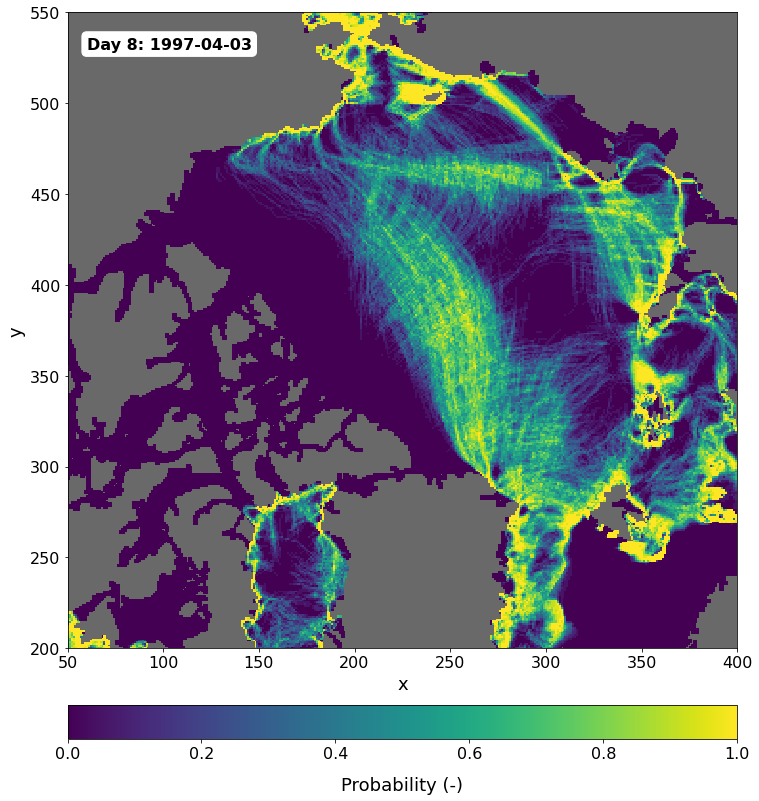

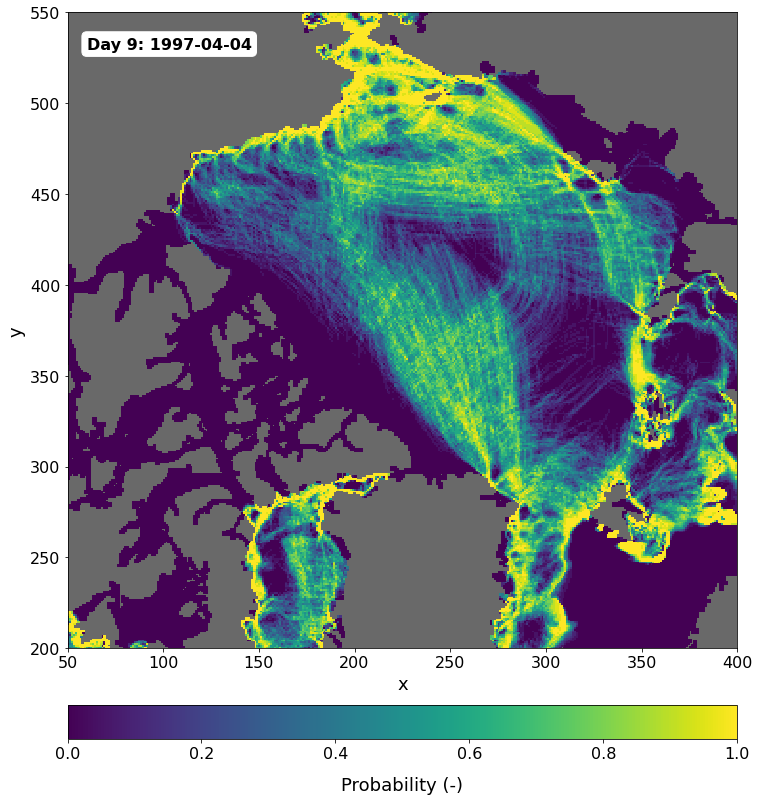

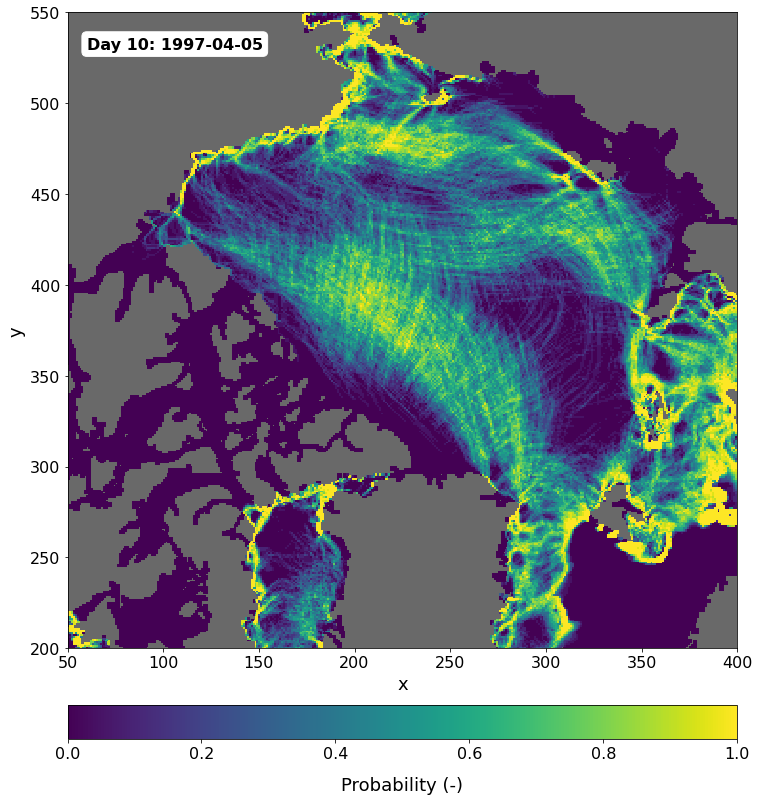

In [12]:
#Figures of the probability of having deformation > ce_defo at least once a day

##Instants of interest
t_interest=np.linspace(0,len(list_days)-1,len(list_days)).astype(np.int64)

for it in t_interest:#iteration over the instants of interest

    ##Creation of the figure
    fig,ax=plt.subplots(1,1,figsize=(12,15))

    ##Plot the probability map
    cf=ax.pcolormesh(proba_defo_occur_day[it,:,:].where(dat_masks.tmask[0,0,:,:]>0))

    ##Set up the colorbar
    cb=plt.colorbar(cf,ticks=[0,0.2,0.4,0.6,0.8,1],orientation="horizontal",pad=0.07)
    cb.set_label('Probability (-)',color="black",fontsize=18,labelpad=15)
    cb.ax.tick_params(color="black",labelcolor="black",labelsize=16)

    ##Some informative texts
    ax.text(60, 530,"Day "+str(list_days[it])+": "+str(dat_sea_ice[0].time_counter[it*24].values)[:10],fontsize=16,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
    
    ##Set up the background
    ax.set_facecolor("dimgrey")
    
    ##Set up the axes
    ax.tick_params("both",labelsize=16)
    ax.set_xlim(50,400) ; ax.set_ylim(200,550)
    ax.set_xlabel("x",fontsize=18,labelpad=5) ; ax.set_ylabel("y",fontsize=18,labelpad=5)

    plt.show()
    ##Save the figure (adapt the path to where you want the figure to be)
    #fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_animations_maps_proba/Illu_proba_sup_"+str(ce_defo*coef_defo)+"_sidefo_"+exp_interest+"_"+period_interest+"_day_"+str(list_days[it]).zfill(2)+".png",\
    #        facecolor="white",edgecolor="none",bbox_inches="tight")
    plt.close(fig)

#### defo > ce_defo at least once over the period of interest

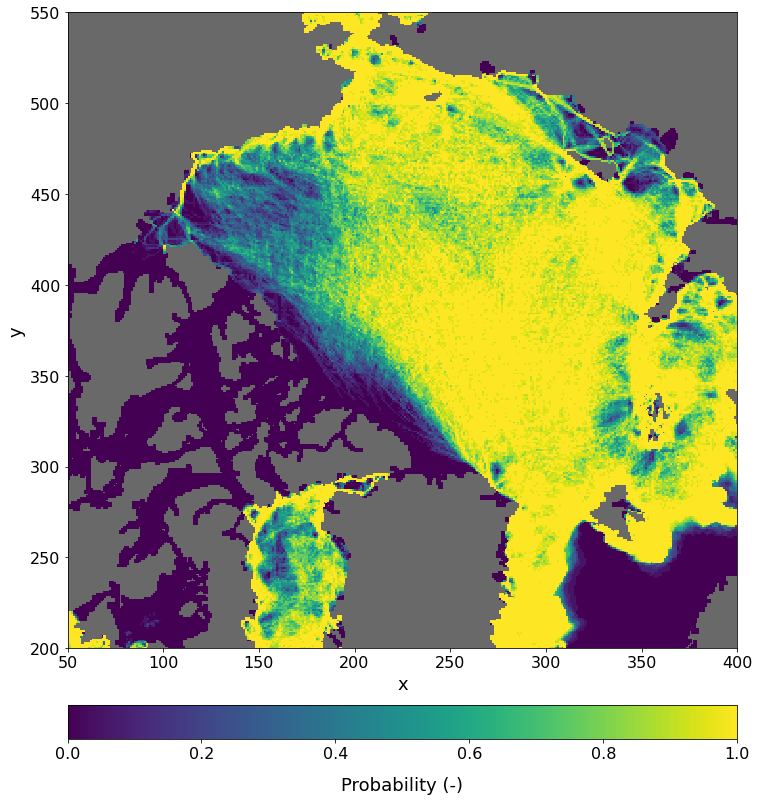

In [13]:
#Figures of the probability of having deformation > ce_defo at least over the period

##Creation of the figure
fig,ax=plt.subplots(1,1,figsize=(12,15))

##Plot the probability map
cf=ax.pcolormesh(proba_defo_occur_period.where(dat_masks.tmask[0,0,:,:]>0))

##Set up the colorbar
cb=plt.colorbar(cf,ticks=[0,0.2,0.4,0.6,0.8,1],orientation="horizontal",pad=0.07)
cb.set_label('Probability (-)',color="black",fontsize=18,labelpad=15)
cb.ax.tick_params(color="black",labelcolor="black",labelsize=16)

##Set up the background
ax.set_facecolor("dimgrey")
    
##Set up the axes
ax.tick_params("both",labelsize=16)
ax.set_xlim(50,400) ; ax.set_ylim(200,550)
ax.set_xlabel("x",fontsize=18,labelpad=5) ; ax.set_ylabel("y",fontsize=18,labelpad=5)

plt.show()
##Save the figure (adapt the path to where you want the figure to be)
#fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_animations_maps_proba/Illu_proba_sup_"+str(ce_defo*coef_defo)+"_sidefo_"+exp_interest+"_"+period_interest+"_over_all_period.png",\
#        facecolor="white",edgecolor="none",bbox_inches="tight")
plt.close(fig)

#### defo > ce_defo not even once in a day

1997-03-27T12:00:00.000000000


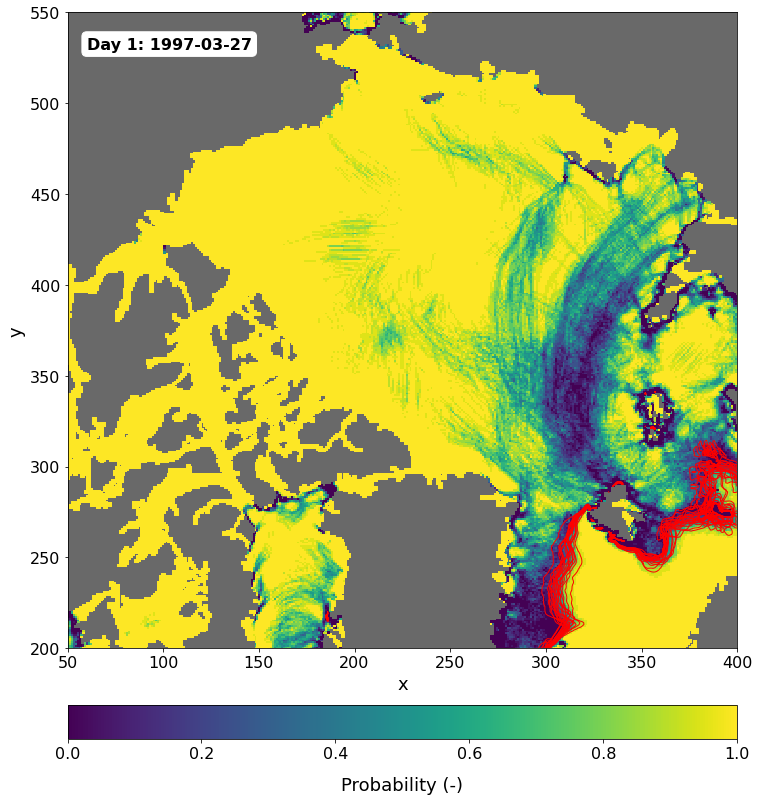

1997-03-28T12:00:00.000000000


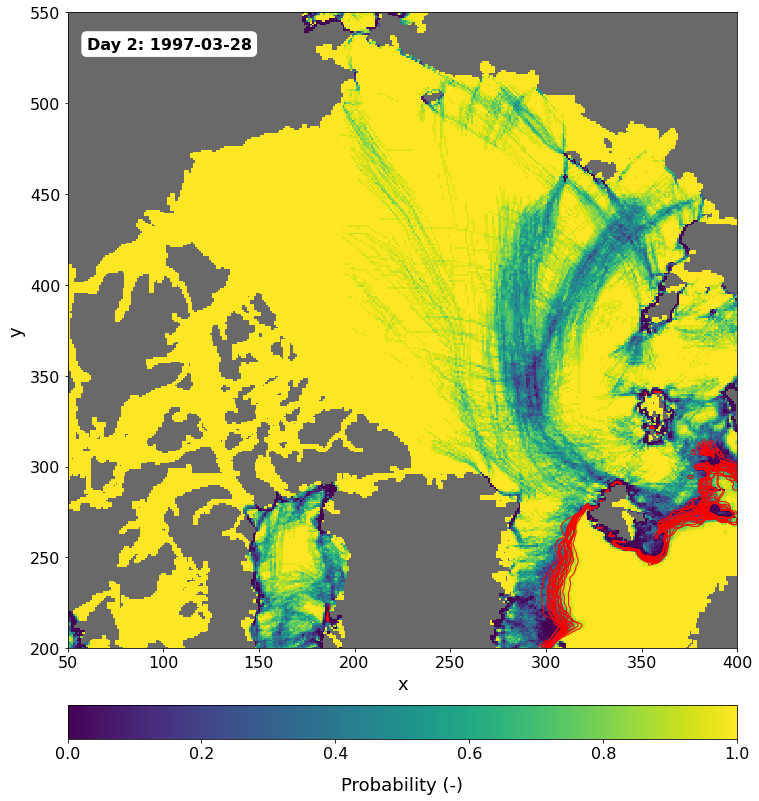

1997-03-29T12:00:00.000000000


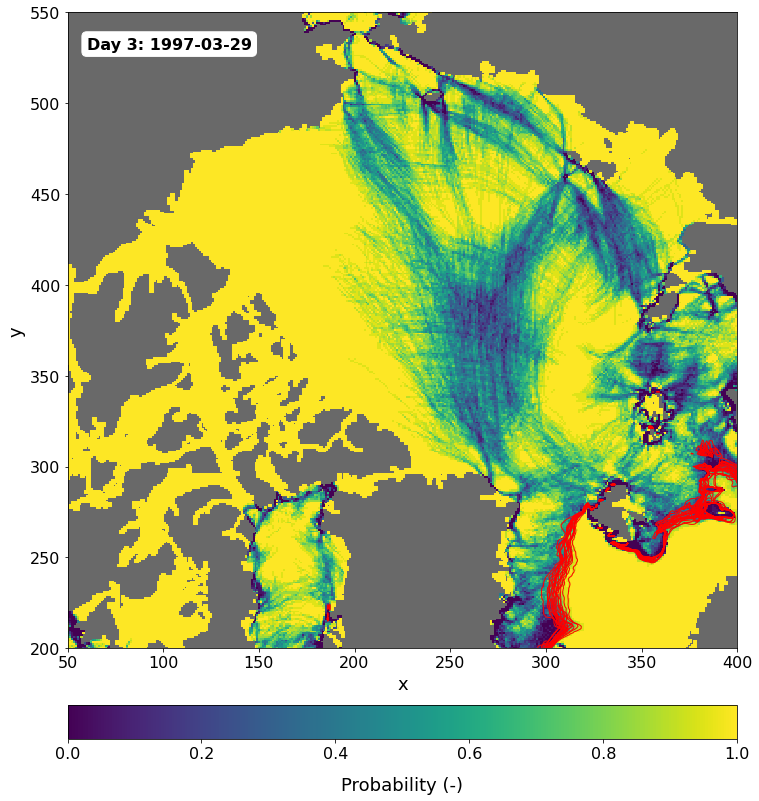

1997-03-30T12:00:00.000000000


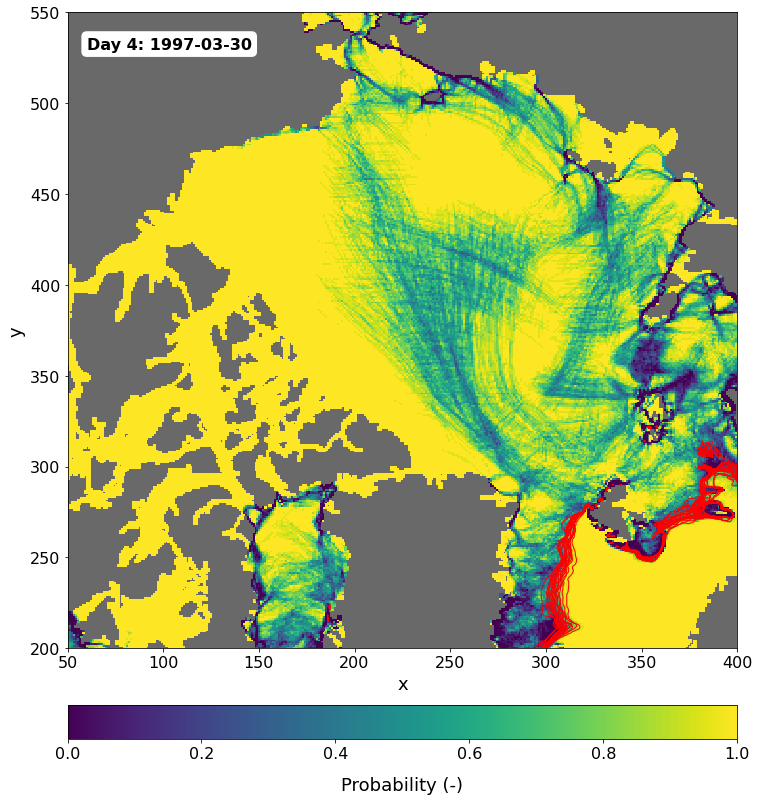

1997-03-31T12:00:00.000000000


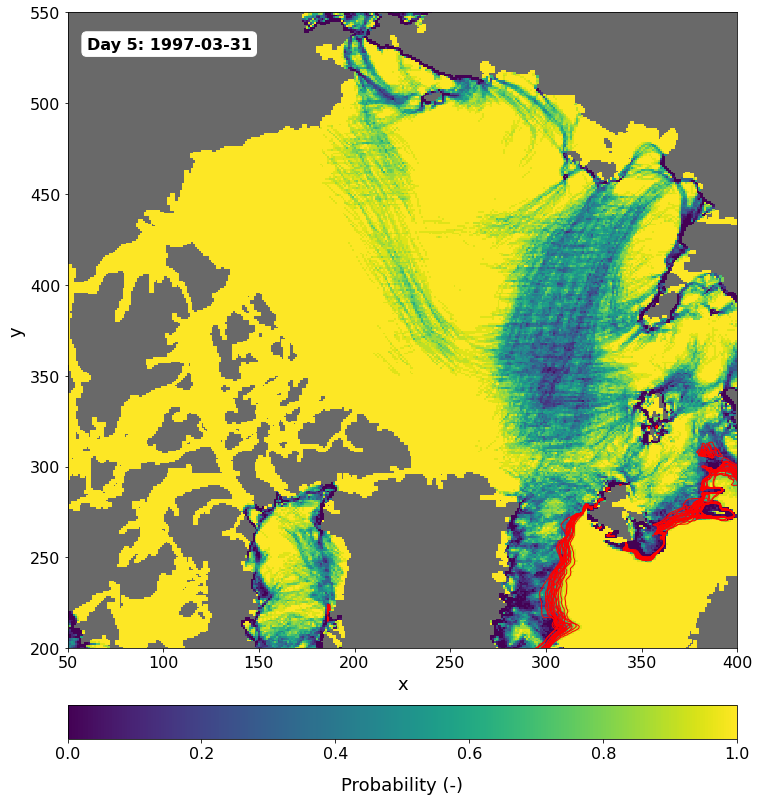

1997-04-01T12:00:00.000000000


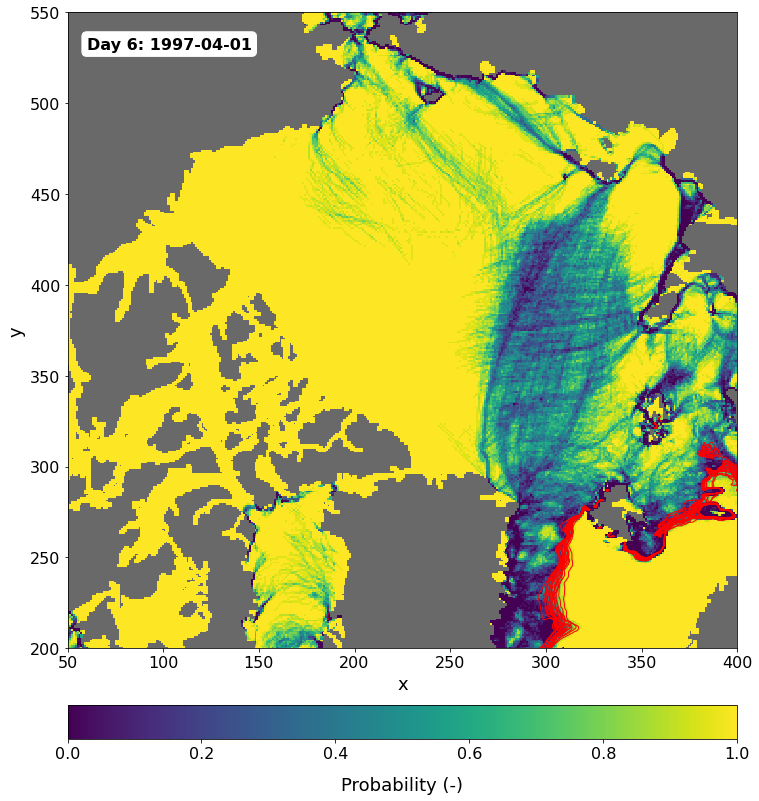

1997-04-02T12:00:00.000000000


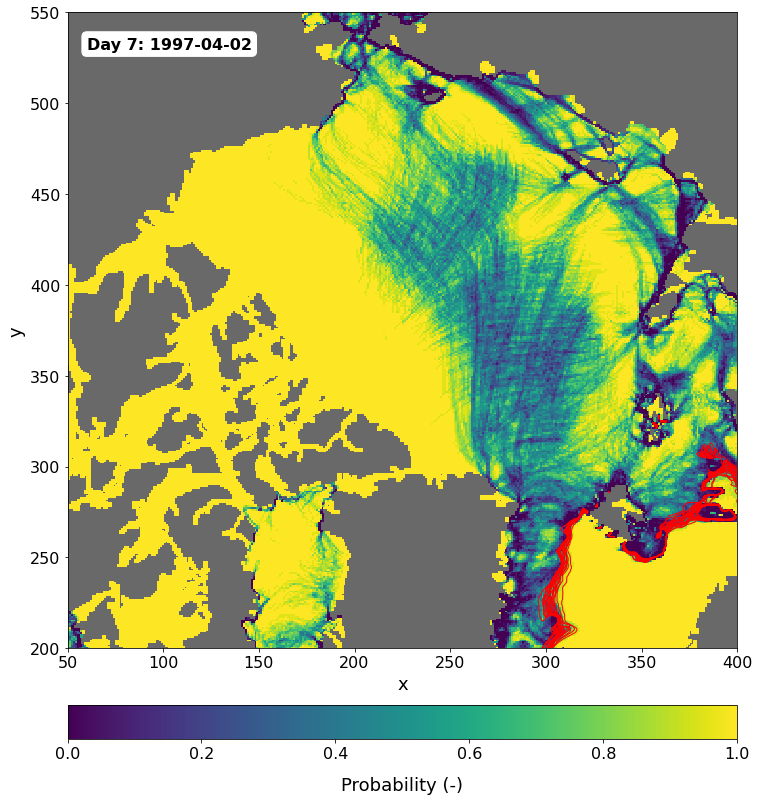

1997-04-03T12:00:00.000000000


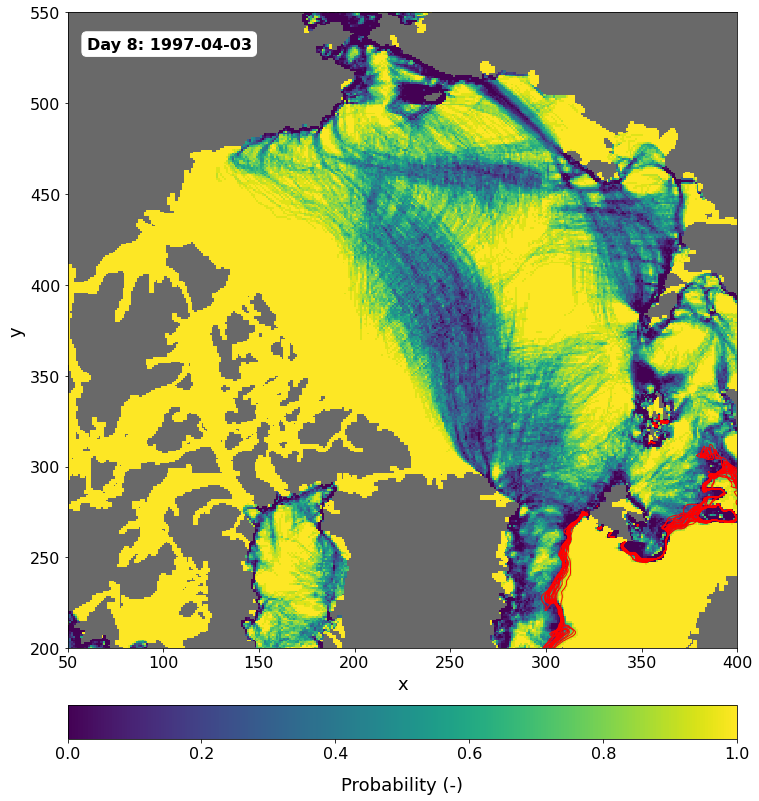

1997-04-04T12:00:00.000000000


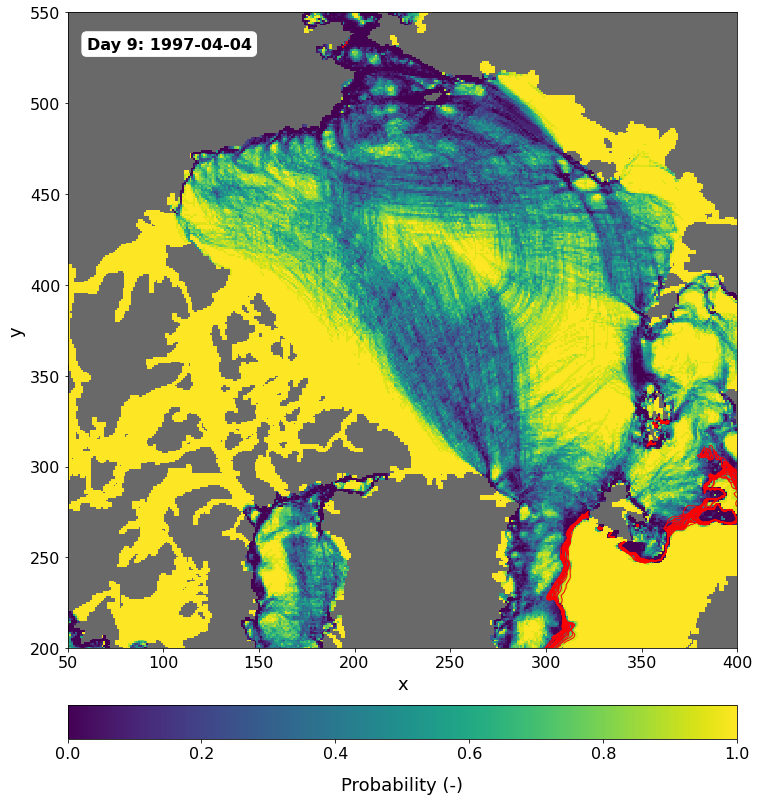

1997-04-05T12:00:00.000000000


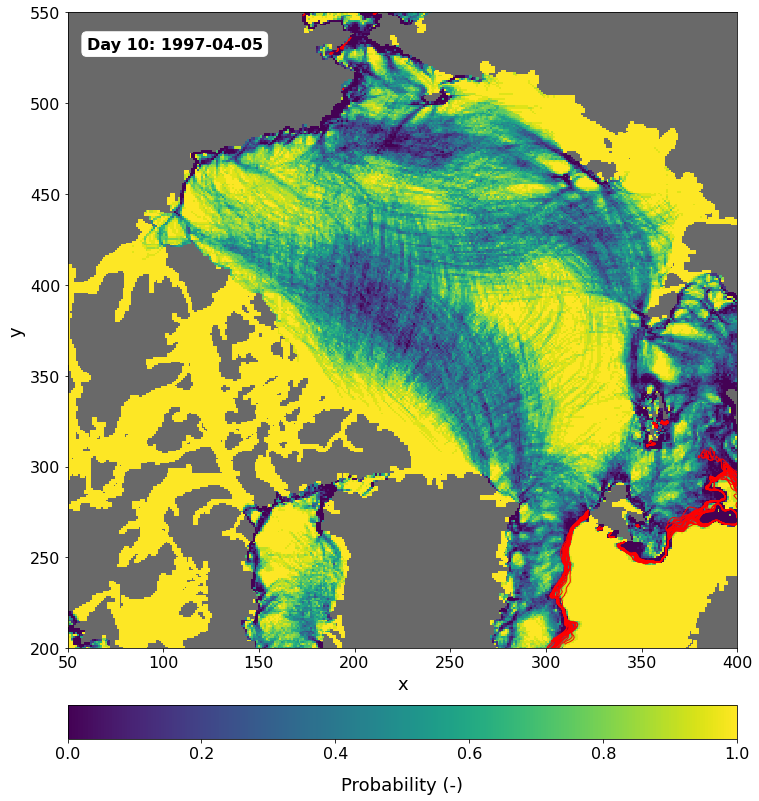

In [14]:
#Figures of the probability of having deformation > ce_defo not even once in a day

##Instants of interest
t_interest=np.linspace(0,len(list_days)-1,len(list_days)).astype(np.int64)

for it in t_interest:#iteration over the instants of interest

    ##Creation of the figure
    fig,ax=plt.subplots(1,1,figsize=(12,15))

    ##Plot the probability map
    cf=ax.pcolormesh(1-proba_defo_occur_day[it,:,:].where(dat_masks.tmask[0,0,:,:]>0))

    ##Set up the colorbar
    cb=plt.colorbar(cf,ticks=[0,0.2,0.4,0.6,0.8,1],orientation="horizontal",pad=0.07)
    cb.set_label('Probability (-)',color="black",fontsize=18,labelpad=15)
    cb.ax.tick_params(color="black",labelcolor="black",labelsize=16)

    ##Display the mean ice edge over the day
    print(dat_concentration_daily[0].time_counter[it].values)
    for imb in range(nb_member):#iteration over the members
        ax.contour(dat_concentration_daily[imb][it,:,:].where(dat_masks.tmask[0,0,:,:]>0),levels=[0.15],colors=["red"],linewidths=1)
    
    ##Some informative texts
    ax.text(60, 530,"Day "+str(list_days[it])+": "+str(dat_sea_ice[0].time_counter[it*24].values)[:10],fontsize=16,fontweight="bold",color="black",\
                  bbox=dict(facecolor='white', edgecolor='white', boxstyle='round'))
    
    ##Set up the background
    ax.set_facecolor("dimgrey")
    
    ##Set up the axes
    ax.tick_params("both",labelsize=16)
    ax.set_xlim(50,400) ; ax.set_ylim(200,550)
    ax.set_xlabel("x",fontsize=18,labelpad=5) ; ax.set_ylabel("y",fontsize=18,labelpad=5)

    plt.show()
    ##Save the figure (adapt the path to where you want the figure to be)
    #fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_animations_maps_proba/Illu_proba_never_sup_"+str(ce_defo*coef_defo)+"_sidefo_"+exp_interest+"_"+period_interest+"_day_"+str(list_days[it]).zfill(2)+".png",\
    #        facecolor="white",edgecolor="none",bbox_inches="tight")
    plt.close(fig)

#### defo > ce_defo not even once over the period

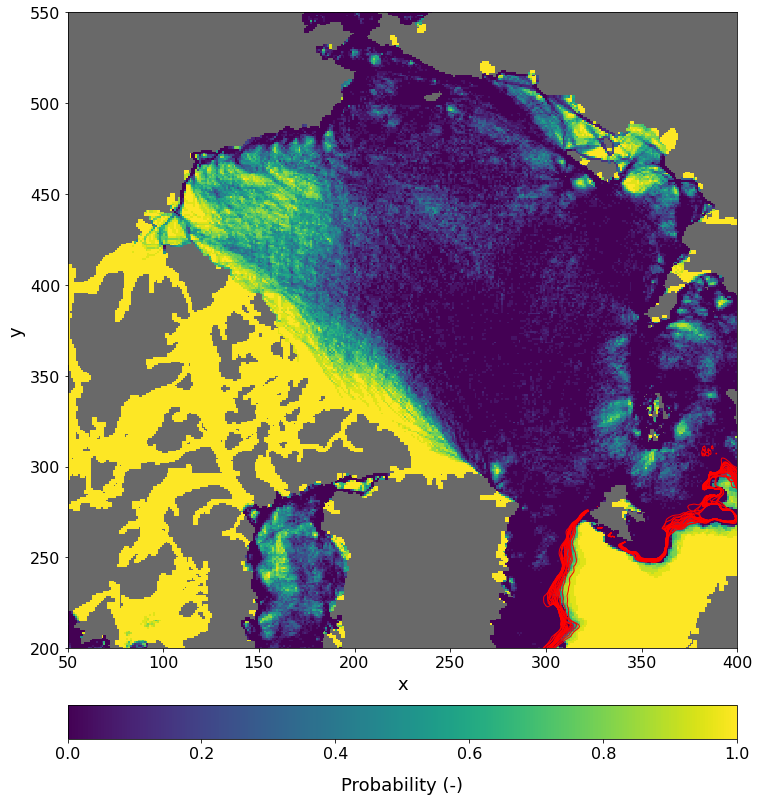

In [15]:
#Figures of the probability of having deformation > ce_defo not even once over the period

##Creation of the figure
fig,ax=plt.subplots(1,1,figsize=(12,15))

##Plot the probability map
cf=ax.pcolormesh(1-proba_defo_occur_period.where(dat_masks.tmask[0,0,:,:]>0))

##Set up the colorbar
cb=plt.colorbar(cf,ticks=[0,0.2,0.4,0.6,0.8,1],orientation="horizontal",pad=0.07)
cb.set_label('Probability (-)',color="black",fontsize=18,labelpad=15)
cb.ax.tick_params(color="black",labelcolor="black",labelsize=16)

##Display the mean ice edge over the period    
for imb in range(nb_member):#iteration over the members
    ax.contour(dat_concentration_mean_period[imb].where(dat_masks.tmask[0,0,:,:]>0),levels=[0.15],colors=["red"],linewidths=1)

##Set up the background
ax.set_facecolor("dimgrey")
    
##Set up the axes
ax.tick_params("both",labelsize=16)
ax.set_xlim(50,400) ; ax.set_ylim(200,550)
ax.set_xlabel("x",fontsize=18,labelpad=5) ; ax.set_ylabel("y",fontsize=18,labelpad=5)

plt.show()
##Save the figure (adapt the path to where you want the figure to be)
#fig.savefig("/lustre/fsn1/projects/rech/cli/udf71br/figures_animations_maps_proba/Illu_proba_never_sup_"+str(ce_defo*coef_defo)+"_sidefo_"+exp_interest+"_"+period_interest+"_over_all_period.png",\
#        facecolor="white",edgecolor="none",bbox_inches="tight")
plt.close(fig)